In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
 # Install the scikeras library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, precision_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

## **importing dataset**

In [ ]:
data_train=pd.read_csv('8_family_training.csv')
data_test=pd.read_csv('8_family_testing.csv')
data_validation=pd.read_csv('8_family_validation.csv')

In [ ]:
data_train.head()

,Malware,Executable_name,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,Benign,Benign_3071,0.0,13.0,11.0,6.0,13.0,3.0,9.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Benign,Benign_2017,179.0,780.0,729.0,93.0,355.0,63.0,1334.0,1755.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,qbot,backdoor_qbot_2020_124,54.0,400.0,482.0,104.0,286.0,31.0,412.0,1081.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,emotet,spyware_emotet_2019_223,12.0,146.0,197.0,71.0,116.0,223.0,467.0,77942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Benign,Benign_2048,0.0,12.0,37.0,6.0,7.0,7.0,4.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
count=data_train['Malware'].value_counts()
print(count)

Malware
Benign    1019
qbot       509
fareit     486
shade      310
emotet     298
ursnif     254
gozi       158
banbra     150
tofsee     105
Name: count, dtype: int64


In [ ]:
count_test=data_test['Malware'].value_counts()
print(count_test)

Malware
Benign    127
qbot       64
fareit     60
shade      39
emotet     37
ursnif     31
gozi       20
banbra     18
tofsee     13
Name: count, dtype: int64


In [ ]:
count_validation=data_validation['Malware'].value_counts()
print(count_validation)

Malware
Benign    128
qbot       64
fareit     61
shade      39
emotet     38
ursnif     32
gozi       20
banbra     19
tofsee     13
Name: count, dtype: int64


In [ ]:
X_train=data_train.drop(['Malware'],axis=1)
y_trian=data_train['Malware']

In [ ]:
X_test=data_test.drop(['Malware'],axis=1)
y_test=data_test['Malware']

In [ ]:
X_validation=data_validation.drop(['Malware'],axis=1)
y_validation=data_validation['Malware']

In [ ]:
X_train.head()

,Executable_name,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,NtQuerySystemInformation,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,Benign_3071,0.0,13.0,11.0,6.0,13.0,3.0,9.0,32.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Benign_2017,179.0,780.0,729.0,93.0,355.0,63.0,1334.0,1755.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,backdoor_qbot_2020_124,54.0,400.0,482.0,104.0,286.0,31.0,412.0,1081.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,spyware_emotet_2019_223,12.0,146.0,197.0,71.0,116.0,223.0,467.0,77942.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Benign_2048,0.0,12.0,37.0,6.0,7.0,7.0,4.0,29.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

lable = LabelEncoder()


for i in X_train.columns:
  if X_train[i].dtype == 'object':
    X_train[i] = lable.fit_transform(X_train[i])

In [ ]:
X_train.head()

,Executable_name,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,NtQuerySystemInformation,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,864,0.0,13.0,11.0,6.0,13.0,3.0,9.0,32.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,179.0,780.0,729.0,93.0,355.0,63.0,1334.0,1755.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1261,54.0,400.0,482.0,104.0,286.0,31.0,412.0,1081.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2621,12.0,146.0,197.0,71.0,116.0,223.0,467.0,77942.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37,0.0,12.0,37.0,6.0,7.0,7.0,4.0,29.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for j in X_test.columns:
  if X_test[j].dtype == 'object':
    X_test[j] = lable.fit_transform(X_test[j])

In [ ]:
for k in X_validation.columns:
  if X_validation[k].dtype == 'object':
    X_validation[k] = lable.fit_transform(X_validation[k])

In [ ]:
y_train=lable.fit_transform(y_trian)
y_test=lable.fit_transform(y_test)
y_validation=lable.fit_transform(y_validation)

In [ ]:
label_mapping_train = dict(zip(range(len(lable.classes_)), lable.classes_))


# Display the mapping
print("Label Mapping:", label_mapping_train)

Label Mapping: {0: 'Benign', 1: 'banbra', 2: 'emotet', 3: 'fareit', 4: 'gozi', 5: 'qbot', 6: 'shade', 7: 'tofsee', 8: 'ursnif'}


In [ ]:
stdScale=StandardScaler()
X_train=stdScale.fit_transform(X_train)
X_test=stdScale.fit_transform(X_test)
X_validation=stdScale.fit_transform(X_validation)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **1DCNN**

In [ ]:
def CNN(filters=32, kernel_size=3, activation='relu', optimizer='adam', Dropout=0.5):
    model = keras.Sequential()
    model.add(layers.Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(X_train.shape[1], 1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=64, kernel_size=kernel_size, activation=activation))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(Dropout))
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(9, activation='softmax'))  # Adjust based on number of classes

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
CNN_model=CNN()
Train=CNN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 75s 666ms/step - accuracy: 0.7855 - loss: 0.7671 - val_accuracy: 0.9469 - val_loss: 0.2279
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 75s 602ms/step - accuracy: 0.9613 - loss: 0.1627 - val_accuracy: 0.9734 - val_loss: 0.1506
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 77s 558ms/step - accuracy: 0.9731 - loss: 0.1105 - val_accuracy: 0.9758 - val_loss: 0.2415
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 572ms/step - accuracy: 0.9772 - loss: 0.0874 - val_accuracy: 0.9758 - val_loss: 0.2008
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 56s 545ms/step - accuracy: 0.9833 - loss: 0.0665 - val_accuracy: 0.9783 - val_loss: 0.1677
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 58s 559ms/step - accuracy: 0.9822 - loss: 0.0909 - val_accuracy: 0.9807 - val_loss: 0.1545
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 565ms/step - accuracy: 0.9790 - loss: 0.0678 - val_accuracy: 0.9807 - val_loss: 0.1851
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 56s 548ms/step - accuracy: 0.9879 - loss: 0

# **Validation evaluation**

In [26]:
val_accuracy = CNN_model.evaluate(X_validation, y_validation)
print("Validation accuracy=", val_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9839 - loss: 0.1311
Validation accuracy= [0.1793503761291504, 0.9806763529777527]


# **Testing**

In [27]:
y_pred=CNN_model.predict(X_test);

y_pred=np.argmax(y_pred,axis=1)

y_pred=y_pred.reshape(-1,1)

accuracy_before_tuining=accuracy_score(y_test,y_pred)
print(f'Accuracy before tuning: {accuracy_before_tuining}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step
Accuracy before tuning: 0.9779951100244498


In [79]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       127
           1       1.00      1.00      1.00        18
           2       1.00      0.95      0.97        37
           3       0.98      0.98      0.98        60
           4       1.00      0.90      0.95        20
           5       0.93      1.00      0.96        64
           6       1.00      0.97      0.99        39
           7       1.00      1.00      1.00        13
           8       0.97      0.94      0.95        31

    accuracy                           0.98       409
   macro avg       0.98      0.97      0.98       409
weighted avg       0.98      0.98      0.98       409



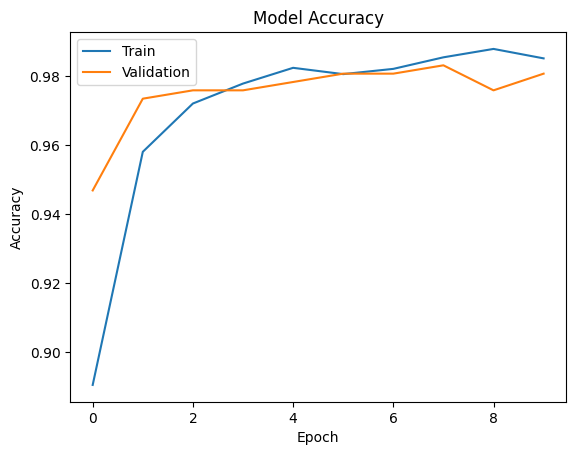

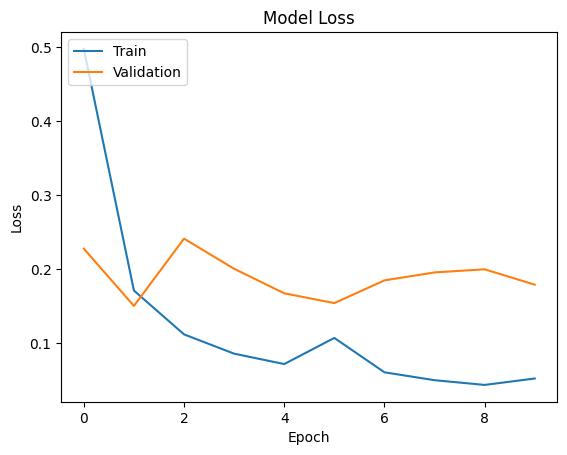

In [29]:
# prompt: plot learning curve

import matplotlib.pyplot as plt

plt.plot(Train.history['accuracy'])
plt.plot(Train.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(Train.history['loss'])
plt.plot(Train.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

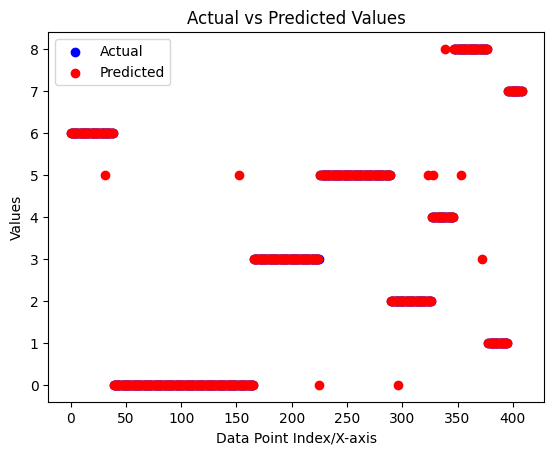

In [30]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')

plt.xlabel('Data Point Index/X-axis')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

0: 'Benign', 1: 'banbra', 2: 'emotet', 3: 'fareit', 4: 'gozi', 5: 'qbot', 6: 'shade', 7: 'tofsee', 8: 'ursnif'

In [68]:
y_pred_labels_1 = []

for i in range(len(y_test)):
  if y_pred[i] == 0:
    y_pred_labels_1.append('Benign')
  elif y_pred[i] == 1:
    y_pred_labels_1.append('banbra')
  elif y_pred[i] == 2:
    y_pred_labels_1.append('emotet')
  elif y_pred[i] == 3:
    y_pred_labels_1.append('fareit')
  elif y_pred[i] == 4:
    y_pred_labels_1.append('gozi')
  elif y_pred[i] == 5:
    y_pred_labels_1.append('qbot')
  elif y_pred[i] == 6:
    y_pred_labels_1.append('shade')
  elif y_pred[i] == 7:
    y_pred_labels_1.append('tofsee')
  elif y_pred[i] == 8:
    y_pred_labels_1.append('ursnif')


#print(y_pred_labels)

In [94]:
y_test_labels = []

for i in range(len(y_test)):
  if y_pred[i] == 0:
    y_test_labels.append('Benign')
  elif y_test[i] == 1:
    y_test_labels.append('banbra')
  elif y_test[i] == 2:
    y_test_labels.append('emotet')
  elif y_test[i] == 3:
    y_test_labels.append('fareit')
  elif y_test[i] == 4:
    y_test_labels.append('gozi')
  elif y_test[i] == 5:
    y_test_labels.append('qbot')
  elif y_test[i] == 6:
    y_test_labels.append('shade')
  elif y_test[i] == 7:
    y_test_labels.append('tofsee')
  elif y_test[i] == 8:
    y_test_labels.append('ursnif')


#print(y_pred_labels)

In [95]:
Output_before_tuining=pd.DataFrame({'Predicted':y_pred_labels_1})
Test_labels=pd.DataFrame({'Actual':y_test_labels})

In [96]:
print(Test_labels['Actual'].value_counts())

Actual
Benign    128
qbot       64
fareit     59
shade      39
emotet     36
ursnif     31
gozi       20
banbra     18
tofsee     13
Name: count, dtype: int64


In [76]:
print(Output_before_tuining['Predicted'].value_counts())

Predicted
Benign    128
qbot       69
fareit     60
shade      38
emotet     35
ursnif     30
gozi       18
banbra     18
tofsee     13
Name: count, dtype: int64


# **Finding best parameters**

In [31]:
def build_model(hp):
    model = keras.Sequential()

    filters = hp.Int('filters', min_value=16, max_value=128, step=16)
    kernel_size = hp.Choice('kernel_size', values=[3, 5, 7])
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.6, step=0.1)
    activation = hp.Choice('activation', values=['relu', 'tanh'])
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])

    model.add(layers.Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(X_train.shape[1], 1)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(filters=64, kernel_size=kernel_size, activation=activation))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(9, activation='softmax'))  # Adjust based on number of classes

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model






In [32]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cnn_tuning'
)

In [33]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

Trial 10 Complete [00h 14m 34s]
val_accuracy: 0.9741641283035278

Best val_accuracy So Far: 0.9802431464195251
Total elapsed time: 02h 52m 23s


In [35]:
best_hyperparameters = tuner.get_best_hyperparameters()[0] # assign to best_hyperparameters

# Access the values using the correct variable name
best_filters = best_hyperparameters.get('filters')
best_kernel_size = best_hyperparameters.get('kernel_size')
best_dropout_rate = best_hyperparameters.get('dropout_rate')
best_activation = best_hyperparameters.get('activation')
best_optimizer = best_hyperparameters.get('optimizer')

print(f"Best Filters: {best_filters}")
print(f"Best Kernel Size: {best_kernel_size}")
print(f"Best Dropout Rate: {best_dropout_rate}")
print(f"Best Activation: {best_activation}")
print(f"Best Optimizer: {best_optimizer}")

Best Filters: 128
Best Kernel Size: 3
Best Dropout Rate: 0.2
Best Activation: tanh
Best Optimizer: adam


In [38]:
CNN_model_2=CNN(filters=best_filters,
    kernel_size=best_kernel_size,
    Dropout=best_dropout_rate,
    activation=best_activation,
    optimizer=best_optimizer)

In [42]:

Train=CNN_model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.8299 - loss: 0.5468 - val_accuracy: 0.9734 - val_loss: 0.1051
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.9680 - loss: 0.1142 - val_accuracy: 0.9783 - val_loss: 0.1018
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9805 - loss: 0.0661 - val_accuracy: 0.9734 - val_loss: 0.0941
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.9851 - loss: 0.0492 - val_accuracy: 0.9831 - val_loss: 0.0728
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.9844 - loss: 0.0410 - val_accuracy: 0.9541 - val_loss: 0.1339
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9846 - loss: 0.0673 - val_accuracy: 0.9807 - val_loss: 0.1014
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9906 - loss: 0.0313 - val_accuracy: 0.9831 - val_loss: 0.0742
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9892 - loss: 0.0321 - val_accu

In [43]:
y_pred_2=CNN_model.predict(X_test);

y_pred_2=np.argmax(y_pred_2,axis=1)

y_pred_2=y_pred.reshape(-1,1)

accuracy_after_tuining=accuracy_score(y_test,y_pred_2)
print(f'Accuracy before tuning: {accuracy_before_tuining}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step
Accuracy before tuning: 0.9779951100244498


## **Graph after Tuining**

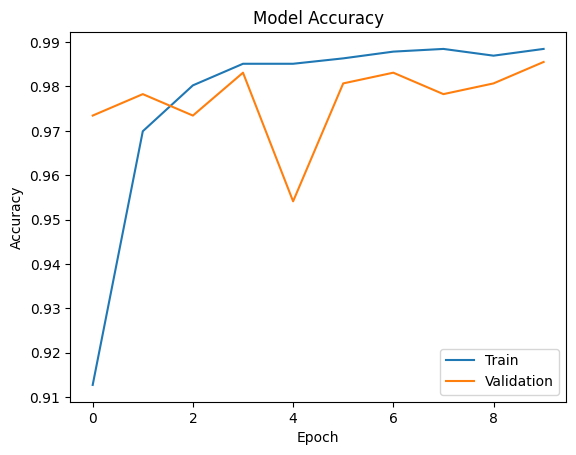

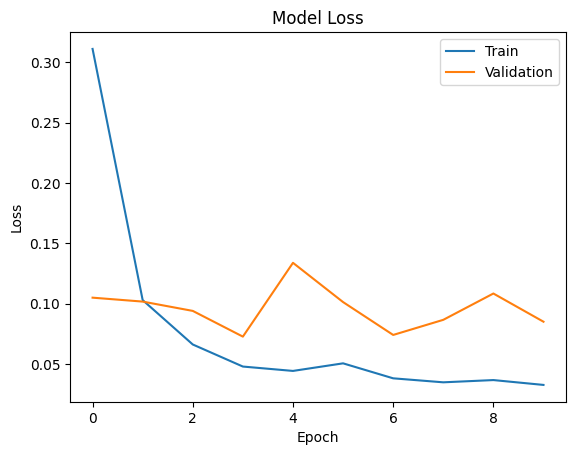

In [100]:
import matplotlib.pyplot as plt

plt.plot(Train.history['accuracy'])
plt.plot(Train.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(Train.history['loss'])
plt.plot(Train.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [83]:
report_2=classification_report(y_test,y_pred_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       127
           1       1.00      1.00      1.00        18
           2       1.00      0.95      0.97        37
           3       0.98      0.98      0.98        60
           4       1.00      0.90      0.95        20
           5       0.93      1.00      0.96        64
           6       1.00      0.97      0.99        39
           7       1.00      1.00      1.00        13
           8       0.97      0.94      0.95        31

    accuracy                           0.98       409
   macro avg       0.98      0.97      0.98       409
weighted avg       0.98      0.98      0.98       409



## **Comparision**

In [48]:
if accuracy_after_tuining>accuracy_before_tuining:
  print('Accuracy after tuning is better')
  print(f'Accuracy after tuning: {accuracy_after_tuining}')
elif accuracy_after_tuining==accuracy_before_tuining:
  print('Accuracy after tuning is equal to accuracy before tuning')
else:
  print('Accuracy after tuning is not better')

Accuracy after tuning is equal to accuracy before tuning


## **Classifying the output**

In [93]:
y_pred_labels_2 = []

for i in range(len(y_test)):
  if y_pred_2[i] == 0:
    y_pred_labels_2.append('Benign')
  elif y_pred_2[i] == 1:
    y_pred_labels_2.append('banbra')
  elif y_pred_2[i] == 2:
    y_pred_labels_2.append('emotet')
  elif y_pred_2[i] == 3:
    y_pred_labels_2.append('fareit')
  elif y_pred_2[i] == 4:
    y_pred_labels_2.append('gozi')
  elif y_pred_2[i] == 5:
    y_pred_labels_2.append('qbot')
  elif y_pred_2[i] == 6:
    y_pred_labels_2.append('shade')
  elif y_pred_2[i] == 7:
    y_pred_labels_2.append('tofsee')
  elif y_pred_2[i] == 8:
    y_pred_labels_2.append('ursnif')

In [97]:
Output_after_tuining=pd.DataFrame({'Predicted':y_pred_labels_2})

In [86]:
print(Output_after_tuining['Predicted'].value_counts())

Predicted
Benign    128
qbot       69
fareit     60
shade      38
emotet     35
ursnif     30
gozi       18
banbra     18
tofsee     13
Name: count, dtype: int64


## **Classification Conusion Matrix**

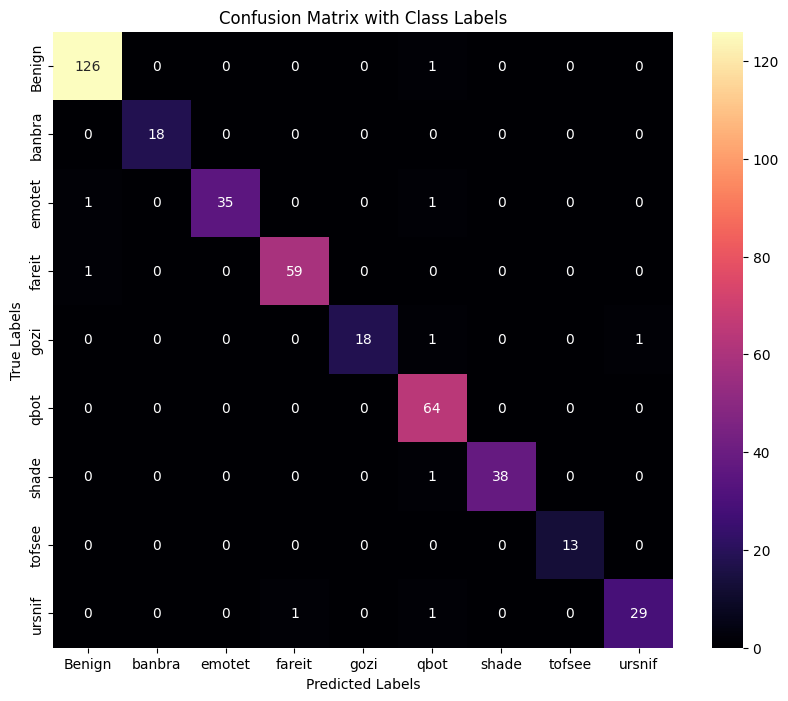

In [103]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=label_mapping_train.values(), yticklabels=label_mapping_train.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with Class Labels")
plt.show()